<a href="https://colab.research.google.com/github/rushikeshnaik779/Graduate-school-kaggle-cmp/blob/main/Graduate_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- This notebook is totally not my work. I took help of the resources present around to solve this problem 
- This notebook is for learning purpose.

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Admission_Predict.csv to Admission_Predict (1).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [ ]:

import io 
data = pd.read_csv(io.BytesIO(uploaded['Admission_Predict.csv']))
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# let's drop irrelevant columns and check if there are any null values in the dataset

df = data.drop(['Serial No.'], axis=1)
df.isnull().sum()


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# let's explore the distribution of the variables of graduate applicants

import matplotlib.pyplot as plt
import seaborn as sns


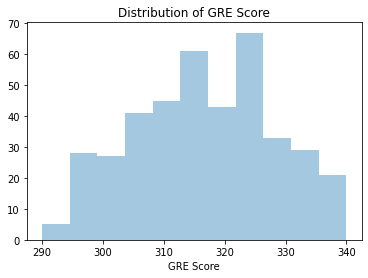

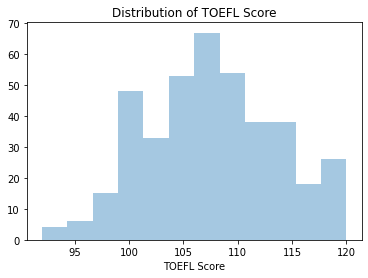

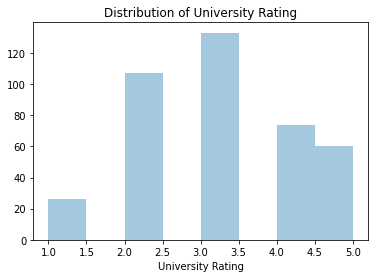

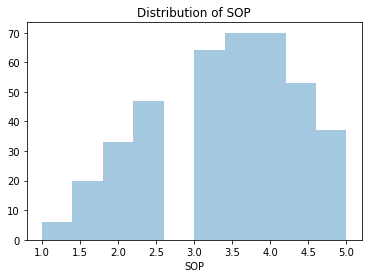

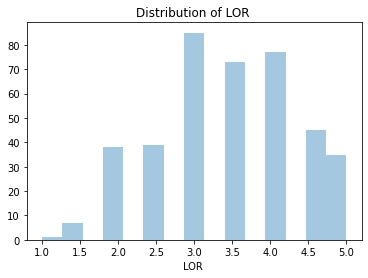

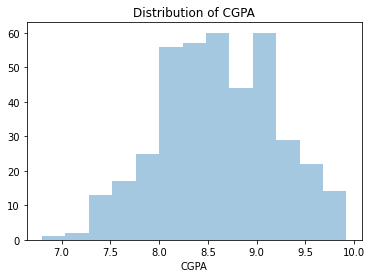

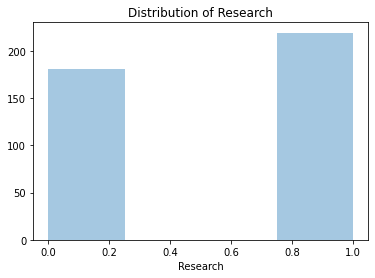

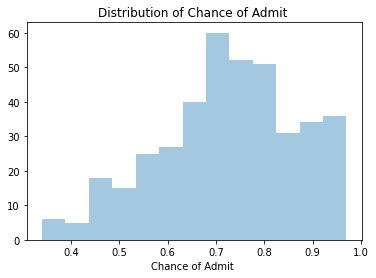

In [ ]:
for i in df.columns:
    fig = sns.distplot(df[i], kde=False)
    plt.title('Distribution of '+str(i))
    plt.show()

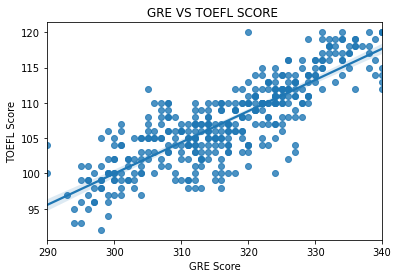

In [ ]:
# it is clear from the distribution, students with varied merit apply for the university
# Understanding the relation between the different factors responsible for 
# graduate admissions

fig = sns.regplot(x='GRE Score', y='TOEFL Score', data=df)
plt.title('GRE VS TOEFL SCORE ')
plt.show()

In [ ]:
# people with higher GRE scores also have higher TOEFL scores which is justified 
# because both TOEFL & GRE have a verbal section which although not similar are relatable
 

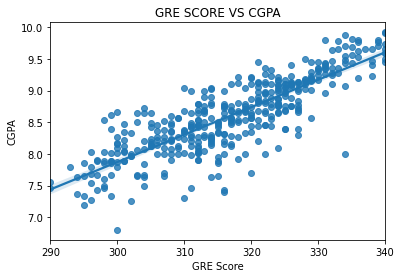

In [ ]:
fig = sns.regplot(x='GRE Score', y='CGPA', data=df)
plt.title('GRE SCORE VS CGPA')
plt.show()

In [ ]:
# Although there are exceptions, people with higher CGPA usually have higher 
# GRE scores maybe because they are smart or hardworking 



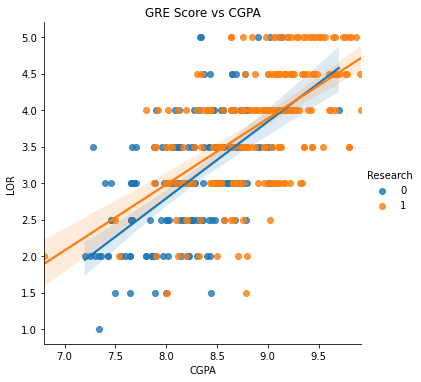

In [ ]:
fig = sns.lmplot(x='CGPA', y='LOR ', data=df, hue='Research')
plt.title('GRE Score vs CGPA')
plt.show()

In [ ]:
# LORs are not that related with CGPA so it is clear that a person LOR is not 
# dependent on that persons acedemic excellence. Having research experience is 
# usually related with a good LOR which might be justified by the fact that 
# supervisors have personal interaction with the students performing research which 
# usually results in good LORs

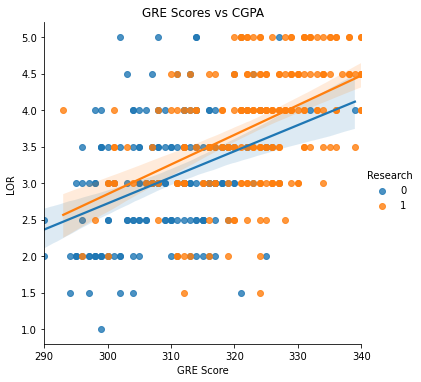

In [ ]:
fig = sns.lmplot(x='GRE Score', y='LOR ', data=df, hue="Research")
plt.title("GRE Scores vs CGPA")
plt.show()

In [ ]:
# GRE SCORES & LORs are also not that related. People with different kinds or LORs
# have all kinds of GRE scores


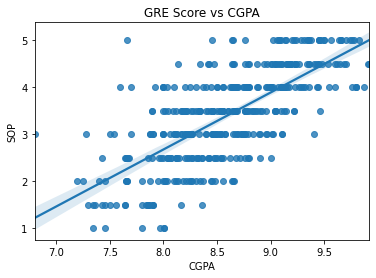

In [ ]:
fig = sns.regplot(x="CGPA", y="SOP", data=df)
plt.title('GRE Score vs CGPA')
plt.show()

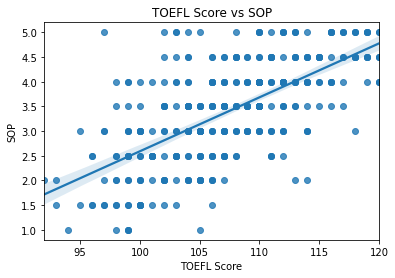

In [ ]:
fig = sns.regplot(x='TOEFL Score', y="SOP", data=df)
plt.title("TOEFL Score vs SOP")
plt.show()

In [ ]:
# Applicants with different kinds of SOP have different kinds of TOEFL Score. 
# So the quality of SOP is not always related to the applicants English Skills

### CORRELATION AMONG VARIABLES 

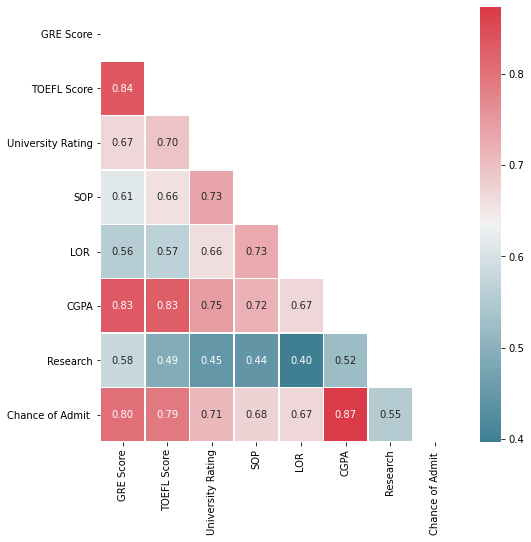

In [ ]:
import numpy as np

corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [ ]:
# lets split the dataset with training and testing set and prepare the inputs and outputs


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=False)

In [ ]:
X_train.shape, X_test.shape

((320, 7), (80, 7))

In [ ]:
# Lets use a bunch of different algorithms 